In [78]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from urllib.request import urlopen
import urllib
from urllib.request import Request
import copy

In [102]:
import urllib.parse


url = "https://www.formula1.com/en/results/2025/races/{search_word1}/{search_word2}/race-result"
num_list = ['1254', '1255', '1256', '1257', '1258', '1259', '1260', '1261', '1262', '1263', '1264', '1277']
gp_list = ['austrailia', 'china', 'japan', 'bahrain', 'saudi-arabia', 'miami', 'emilia-romagna', 'monaco', 'spain', 'canada', 'austria', 'great-britain']
req = Request(url.format(search_word1 = urllib.parse.quote(num_list[0]),
                         search_word2 = urllib.parse.quote(gp_list[0])))
res = urlopen(req)
# driver = webdriver.Chrome(service=Service("./driver/chromedriver"))
# driver.get(url)
soup = BeautifulSoup(res, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="" href="/assets/result/_next/static/media/61c7648cb3623785-s.p.ttf" rel="preload" type="font/ttf"/>
  <link as="font" crossorigin="" href="/assets/result/_next/static/media/63d205ade976fd06-s.p.ttf" rel="preload" type="font/ttf"/>
  <link as="font" crossorigin="" href="/assets/result/_next/static/media/81b7f8b7aea924a5-s.p.woff" rel="preload" type="font/woff"/>
  <link as="font" crossorigin="" href="/assets/result/_next/static/media/8322b4b31b8fd0fa-s.p.ttf" rel="preload" type="font/ttf"/>
  <link as="font" crossorigin="" href="/assets/result/_next/static/media/a0b816123392eb3b-s.p.ttf" rel="preload" type="font/ttf"/>
  <link as="font" crossorigin="" href="/assets/result/_next/static/media/a3bb26ced6898bcb-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/assets/result/_next/static/me

In [14]:
record = soup.find_all(class_="border-b-thin border-surface-neutral-4 hover:bg-[rgb(from_var(--f1rd-colour-surface-neutral-surface-neutral-11)_r_g_b_/_0.03)]")
record

[<tr class="border-b-thin border-surface-neutral-4 hover:bg-[rgb(from_var(--f1rd-colour-surface-neutral-surface-neutral-11)_r_g_b_/_0.03)]"><td class="py-px-16 pr-px-24 md:pr-px-48 whitespace-nowrap !pl-px-16"><p class="typography-module_body-s-semibold__O2lOH">1</p></td><td class="py-px-16 pr-px-24 md:pr-px-48 max-md:collapse max-md:max-w-0 max-md:hidden whitespace-nowrap"><p class="typography-module_body-s-semibold__O2lOH">4</p></td><td class="py-px-16 pr-px-24 md:pr-px-48 whitespace-nowrap"><p class="typography-module_body-s-semibold__O2lOH"><span class="flex gap-px-10 after:block after:bg-[red] after:w-px-10 after:h-full"><span class="DriverAvatar-module_driveravatar__CrhU8 DriverAvatar-module_sm__knPcV"><img alt="" src="https://media.formula1.com/image/upload/c_lfill,w_64/q_auto/d_common:f1:2025:fallback:driver:2025fallbackdriverright.webp/v1740000000/common/f1/2025/mclaren/lannor01/2025mclarenlannor01right.webp" style="background-color:#F47600"/></span><span><span class="max-lg:h

In [15]:
len(record)

19

In [26]:
grid = soup.find_all(class_="py-px-16 pr-px-24 md:pr-px-48 whitespace-nowrap !pl-px-16")
name = soup.find_all(class_="flex gap-px-10 after:block after:bg-[red] after:w-px-10 after:h-full")

In [27]:
print(len(grid), len(name))

20 20


In [29]:
for g, n in zip(grid, name):
    print(f"{g.text}. {n.text[:-3]}")

1. Lando Norris
2. Max Verstappen
3. George Russell
4. Kimi Antonelli
5. Alexander Albon
6. Lance Stroll
7. Nico Hulkenberg
8. Charles Leclerc
9. Oscar Piastri
10. Lewis Hamilton
11. Pierre Gasly
12. Yuki Tsunoda
13. Esteban Ocon
14. Oliver Bearman
NC. Liam Lawson
NC. Gabriel Bortoleto
NC. Fernando Alonso
NC. Carlos Sainz
NC. Jack Doohan
NC. Isack Hadjar


In [64]:
gp_dict = {}

for idx, (num, gp) in enumerate(zip(num_list, gp_list)):
    record_dict = {}
    url = "https://www.formula1.com/en/results/2025/races/{search_word1}/{search_word2}/race-result"
    req = Request(url.format(search_word1 = urllib.parse.quote(num),
                         search_word2 = urllib.parse.quote(gp)))
    res = urlopen(req)
    soup = BeautifulSoup(res, "html.parser")
    print(f"{idx+1}번째, {gp} GP")
    
    grid = soup.find_all(class_="py-px-16 pr-px-24 md:pr-px-48 whitespace-nowrap !pl-px-16")
    name = soup.find_all(class_="flex gap-px-10 after:block after:bg-[red] after:w-px-10 after:h-full")
    
    nc_cnt = 0
    dq_cnt = 0
    print(len(grid), len(name))
    for g, n in zip(grid, name):
        print(f"{g.text}. {n.text[:-3]}")
        if g.text == 'NC':
            nc_cnt += 1
            record_dict[f"{g.text}{nc_cnt}"] = n.text[:-3].replace('\xa0', ' ')
        elif g.text == 'DQ':
            dq_cnt += 1
            record_dict[f"{g.text}{dq_cnt}"] = n.text[:-3].replace('\xa0', ' ')
        else:
            record_dict[int(g.text)] = n.text[:-3].replace('\xa0', ' ')
    gp_dict[gp]=record_dict
    print("--------------------------------------")

1번째, austrailia GP
20 20
1. Lando Norris
2. Max Verstappen
3. George Russell
4. Kimi Antonelli
5. Alexander Albon
6. Lance Stroll
7. Nico Hulkenberg
8. Charles Leclerc
9. Oscar Piastri
10. Lewis Hamilton
11. Pierre Gasly
12. Yuki Tsunoda
13. Esteban Ocon
14. Oliver Bearman
NC. Liam Lawson
NC. Gabriel Bortoleto
NC. Fernando Alonso
NC. Carlos Sainz
NC. Jack Doohan
NC. Isack Hadjar
--------------------------------------
2번째, china GP
20 20
1. Oscar Piastri
2. Lando Norris
3. George Russell
4. Max Verstappen
5. Esteban Ocon
6. Kimi Antonelli
7. Alexander Albon
8. Oliver Bearman
9. Lance Stroll
10. Carlos Sainz
11. Isack Hadjar
12. Liam Lawson
13. Jack Doohan
14. Gabriel Bortoleto
15. Nico Hulkenberg
16. Yuki Tsunoda
NC. Fernando Alonso
DQ. Charles Leclerc
DQ. Lewis Hamilton
DQ. Pierre Gasly
--------------------------------------
3번째, japan GP
20 20
1. Max Verstappen
2. Lando Norris
3. Oscar Piastri
4. Charles Leclerc
5. George Russell
6. Kimi Antonelli
7. Lewis Hamilton
8. Isack Hadjar
9. 

In [65]:
gp_dict

{'austrailia': {1: 'Lando Norris',
  2: 'Max Verstappen',
  3: 'George Russell',
  4: 'Kimi Antonelli',
  5: 'Alexander Albon',
  6: 'Lance Stroll',
  7: 'Nico Hulkenberg',
  8: 'Charles Leclerc',
  9: 'Oscar Piastri',
  10: 'Lewis Hamilton',
  11: 'Pierre Gasly',
  12: 'Yuki Tsunoda',
  13: 'Esteban Ocon',
  14: 'Oliver Bearman',
  'NC1': 'Liam Lawson',
  'NC2': 'Gabriel Bortoleto',
  'NC3': 'Fernando Alonso',
  'NC4': 'Carlos Sainz',
  'NC5': 'Jack Doohan',
  'NC6': 'Isack Hadjar'},
 'china': {1: 'Oscar Piastri',
  2: 'Lando Norris',
  3: 'George Russell',
  4: 'Max Verstappen',
  5: 'Esteban Ocon',
  6: 'Kimi Antonelli',
  7: 'Alexander Albon',
  8: 'Oliver Bearman',
  9: 'Lance Stroll',
  10: 'Carlos Sainz',
  11: 'Isack Hadjar',
  12: 'Liam Lawson',
  13: 'Jack Doohan',
  14: 'Gabriel Bortoleto',
  15: 'Nico Hulkenberg',
  16: 'Yuki Tsunoda',
  'NC1': 'Fernando Alonso',
  'DQ1': 'Charles Leclerc',
  'DQ2': 'Lewis Hamilton',
  'DQ3': 'Pierre Gasly'},
 'japan': {1: 'Max Verstappen',

In [76]:
driver_dict = {}
for each in gp_dict.values():
    grid = list(each.keys())
    names = list(each.values())
    for g, name in zip(grid, names):
        if name in driver_dict:
            driver_dict[name].append(g)
            
        else:
            driver_dict[name] = [g]
    

In [82]:
driver_dict

{'Lando Norris': [1, 2, 2, 3, 4, 2, 2, 1, 2, 18, 1, 1],
 'Max Verstappen': [2, 4, 1, 6, 2, 4, 1, 4, 10, 2, 'NC2', 5],
 'George Russell': [3, 3, 5, 2, 5, 3, 7, 11, 4, 1, 5, 10],
 'Kimi Antonelli': [4, 6, 6, 11, 6, 6, 'NC1', 18, 'NC1', 3, 'NC3', 'NC1'],
 'Alexander Albon': [5, 7, 9, 12, 9, 5, 5, 9, 'NC2', 'NC2', 'NC1', 8],
 'Lance Stroll': [6, 9, 20, 17, 16, 16, 15, 15, 17, 14, 7],
 'Nico Hulkenberg': [7, 15, 16, 'DQ1', 15, 14, 12, 16, 5, 8, 9, 3],
 'Charles Leclerc': [8, 'DQ1', 4, 4, 3, 7, 6, 2, 3, 5, 3, 14],
 'Oscar Piastri': [9, 1, 3, 1, 1, 1, 3, 3, 1, 4, 2, 2],
 'Lewis Hamilton': [10, 'DQ2', 7, 5, 7, 8, 4, 5, 6, 6, 4, 4],
 'Pierre Gasly': [11, 'DQ3', 13, 7, 'NC2', 13, 13, 'NC2', 8, 15, 13, 6],
 'Yuki Tsunoda': [12, 16, 12, 9, 'NC1', 10, 10, 17, 13, 12, 16, 15],
 'Esteban Ocon': [13, 5, 18, 8, 14, 12, 'NC2', 7, 16, 9, 10, 13],
 'Oliver Bearman': [14, 8, 10, 10, 13, 'NC3', 17, 12, 17, 11, 11, 11],
 'Liam Lawson': ['NC1', 12, 17, 16, 12, 'NC1', 14, 8, 11, 'NC1', 6, 'NC4'],
 'Gabriel Bor

In [ ]:
chart_dict = copy.deepcopy(driver_dict)

for driver, results in chart_dict.items():
    for i, result in enumerate(results):
        if isinstance(result, str) and ('NC' in result or 'DQ' in result):
            results[i] = 20


In [81]:
chart_dict

{'Lando Norris': [1, 2, 2, 3, 4, 2, 2, 1, 2, 18, 1, 1],
 'Max Verstappen': [2, 4, 1, 6, 2, 4, 1, 4, 10, 2, 20, 5],
 'George Russell': [3, 3, 5, 2, 5, 3, 7, 11, 4, 1, 5, 10],
 'Kimi Antonelli': [4, 6, 6, 11, 6, 6, 20, 18, 20, 3, 20, 20],
 'Alexander Albon': [5, 7, 9, 12, 9, 5, 5, 9, 20, 20, 20, 8],
 'Lance Stroll': [6, 9, 20, 17, 16, 16, 15, 15, 17, 14, 7],
 'Nico Hulkenberg': [7, 15, 16, 20, 15, 14, 12, 16, 5, 8, 9, 3],
 'Charles Leclerc': [8, 20, 4, 4, 3, 7, 6, 2, 3, 5, 3, 14],
 'Oscar Piastri': [9, 1, 3, 1, 1, 1, 3, 3, 1, 4, 2, 2],
 'Lewis Hamilton': [10, 20, 7, 5, 7, 8, 4, 5, 6, 6, 4, 4],
 'Pierre Gasly': [11, 20, 13, 7, 20, 13, 13, 20, 8, 15, 13, 6],
 'Yuki Tsunoda': [12, 16, 12, 9, 20, 10, 10, 17, 13, 12, 16, 15],
 'Esteban Ocon': [13, 5, 18, 8, 14, 12, 20, 7, 16, 9, 10, 13],
 'Oliver Bearman': [14, 8, 10, 10, 13, 20, 17, 12, 17, 11, 11, 11],
 'Liam Lawson': [20, 12, 17, 16, 12, 20, 14, 8, 11, 20, 6, 20],
 'Gabriel Bortoleto': [20, 14, 19, 18, 18, 20, 18, 14, 12, 14, 8, 20],
 'Fer

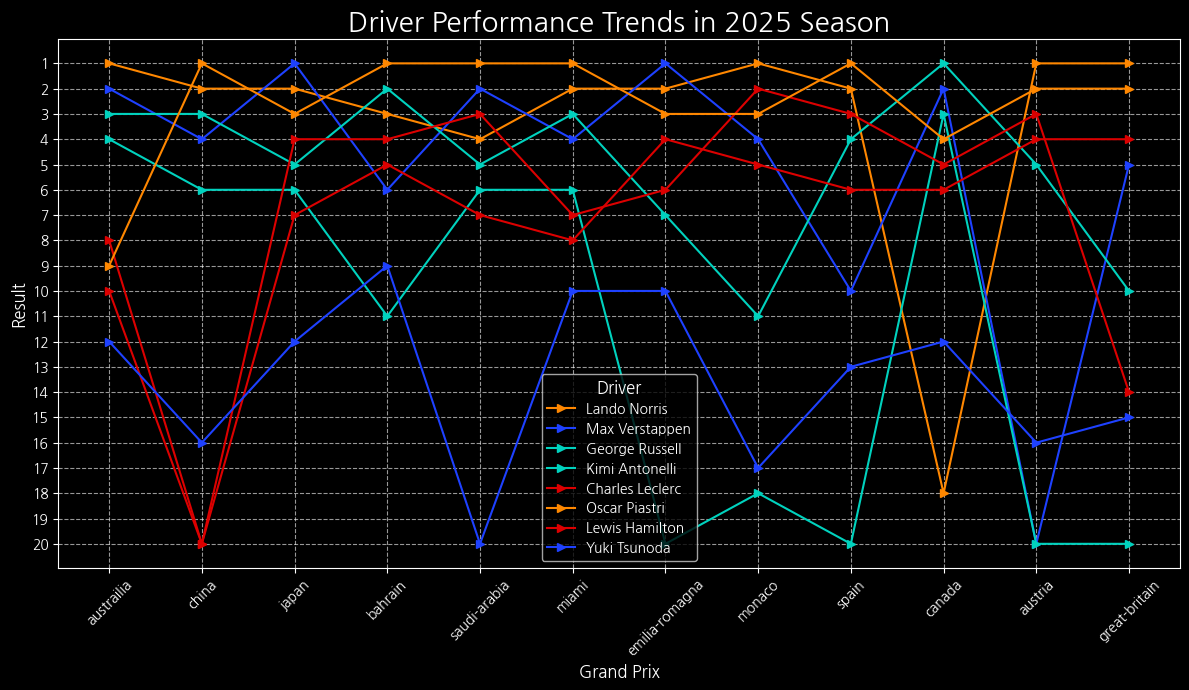

In [110]:
driver_colors = {
    'Lando Norris': '#FF8700',      
    'Oscar Piastri' : '#FF8700',
    'Max Verstappen': '#1E41FF',     
    'Yuki Tsunoda' : '#1E41FF',
    'George Russell': '#00D2BE',      
    'Kimi Antonelli' : '#00D2BE',    
    'Charles Leclerc': '#DC0000',
    'Lewis Hamilton': '#DC0000',

}

rounds = list(range(1, len(next(iter(chart_dict.values()))) + 1))

plt.figure(figsize=(12, 7))
plt.style.use('dark_background')

# 꺾은선 그래프 그리기
for driver, results in chart_dict.items():
    if driver in ['Lando Norris', 'Max Verstappen', 'Charles Leclerc', 'Lewis Hamilton', 'Oscar Piastri', 'George Russell', 'Yuki Tsunoda', 'Kimi Antonelli']:
        plt.plot(rounds, results, marker='>', label=driver, color=driver_colors[driver])

# Y축 등수 표시
plt.xticks(ticks=range(1, len(gp_list) + 1), labels=gp_list, rotation=45)
plt.yticks(range(1, 21))
plt.gca().invert_yaxis()

# 제목, 레이블
plt.title('Driver Performance Trends in 2025 Season', fontsize=20)
plt.xlabel('Grand Prix', fontsize=12)
plt.ylabel('Result', fontsize=12)

# 범례, 그리드
plt.legend(title='Driver', title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()